[Quiz] z = np.linspace(-10, 10, 1000)일 때:

sigmoid(z)을 정의하고
z, sigmoid(z)에 대해 그래프를 그려라

In [1]:
import numpy as np

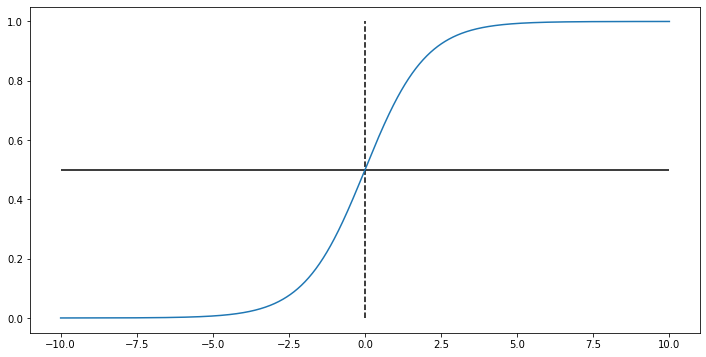

In [2]:
z = np.linspace(-10, 10, 1000)
sigmoid = lambda x: 1/(1 + np.exp(-x))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(z, sigmoid(z))
ax.hlines(0.5, -10, 10, 'k', '-')
ax.vlines(0, 0, 1, 'k', '--')

[Quiz] 10000개의 P(y=1)가 있다. 10000개의 y값이 있다.
- 이때, seed를 123 고정해서 p, y을 생성하고
- likelihood와 log likelihood를 계산해보고, 이를 비교해보자.

- Likelyhood(Y)=∏i=1n P(yi=1)yi∗(1−P(yi=1))1−yi
- logLikelyhood(Y)=LL(Y)=∑i=1nyilog(P(yi=1))+(1−yi)log((1−P(yi=1))
- Loss(Y)=NLL(Y)=−∑i=1n yiP(yi=1)+(1−yi)(1−P(yi=1)

In [3]:
np.random.seed(123)
py1 = np.random.random(10000)
randy = np.random.randint(0, 2, 10000)
goody = np.where(py1 + np.random.random(10000)*.2 > .5, 1, 0)

In [8]:
Lrandy = np.cumprod(py1**randy * (1 - py1)**(1-randy))[-1]
LLrandy = np.sum(randy*np.log(py1) + (1-randy)*np.log(1-py1))
Lossrandy = - LLrandy
Lrandy, LLrandy, Lossrandy

(0.0, -10099.305164935557, 10099.305164935557)

In [9]:
Lgoody = np.cumprod(py1**goody * (1 - py1)**(1-goody))[-1]
LLgoody = np.sum(goody*np.log(py1) + (1-goody)*np.log(1-py1))
Lossgoody = - LLgoody
Lgoody, LLgoody, Lossgoody

(0.0, -3330.566343448386, 3330.566343448386)

[Quiz] epoch는 그대로 유지하고, 
- lrs = [0.0005, 0.00005, 0.00001, 0.000005]를 
- epoch가 30000, 60000, 90000 일때 각각 적용해서 
- loss가 이전과 달리 어떻게 변화하는 지 그래프로 그려보자.

In [12]:
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

NameError: name 'X' is not defined

In [11]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(123)
w = rand(X.shape[-1]) - 0.5
w

NameError: name 'X' is not defined

In [10]:
EPOCH = 50000 # 50000
batch = 34
lrs = [0.0005, 0.00005, 0.00001]
lr = 0.00005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
m = 0.95
v = np.zeros(w.shape)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    epochLoss = 0
    if epoch < 20000:
        lr = lrs[0]
    elif epoch < 40000:
        lr = lrs[1]
    else: lr = lrs[2]
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        # 아래 사항은 구현하세요.
        yhat = sigmoid(x_batch.dot(w))
        epochLoss += - y_batch.T.dot(np.log(yhat + MIN)) \
                    - (1-y_batch).T.dot(np.log(1-yhat + MIN))
        dw = x_batch.T.dot(yhat - y_batch)
        v = m*v - lr*dw
        w += v
        
    epochLoss /= rows
    losses.append(epochLoss)

NameError: name 'X' is not defined